<a href="https://colab.research.google.com/github/juliakahan/TechChallenge/blob/main/MLtask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A company selling luxury products prepares a marketing campaign to promote their brand new model of a golden watch.
While selling the previous model they collected the following data about the customers.
**Age** - the age of customer
**Salary** - the estimated customer's salary value
**Purchased** - information if given customer purchased the product or not, **1** - yes, **0** - no

Deliver a solution in Python which leverages Machine Learning and the available data to help the company predict 
**which customers may be willing to buy their new watch**, so that they can properly target their marketing efforts.
The solution should answer the question if customer in given age who earns given salary **will buy the product or not**.



In [27]:
import pandas as pd
import numpy as np

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [29]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [30]:
df = pd.read_csv('/content/DATA/Customers.csv')
print(df) 

     Age  Salary  Purchased
0     27   57000          0
1     19   76000          0
2     27   58000          0
3     27   84000          0
4     32  150000          1
..   ...     ...        ...
375   46   41000          1
376   51   23000          1
377   50   20000          1
378   36   33000          0
379   49   36000          1

[380 rows x 3 columns]


In [31]:
print("Number of instances: ", df.shape[0])

Number of instances:  380


In [32]:
df.isnull().sum()

Age          0
Salary       0
Purchased    0
dtype: int64

In [33]:
X_customers = df[["Age", "Salary"]]
y_customers = df["Purchased"]

In [34]:
X_customers

,Age,Salary
0,27,57000
1,19,76000
2,27,58000
3,27,84000
4,32,150000
...,...,...
375,46,41000
376,51,23000
377,50,20000
378,36,33000


Mapping binary values to the suitable answer type.

In [35]:
y_customers = y_customers.map({0:'no',1:'yes'})
y_customers

0       no
1       no
2       no
3       no
4      yes
      ... 
375    yes
376    yes
377    yes
378     no
379    yes
Name: Purchased, Length: 380, dtype: object

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_customers, y_customers, test_size=0.2)

In [37]:
param_dist = {'n_estimators': randint(50,250),
              'max_depth': randint(1,10)}

In [38]:
tree_clf = RandomForestClassifier()

In [39]:
rand_search = RandomizedSearchCV(tree_clf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f7d55f46c70>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f7d55f41730>})

In [40]:
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 3, 'n_estimators': 131}


In [41]:
y_pred = best_rf.predict(X_test)

In [42]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8947368421052632


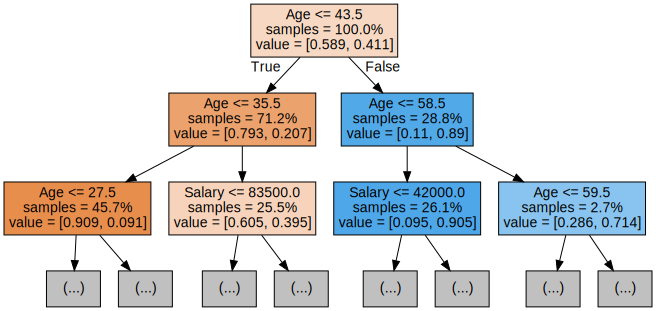

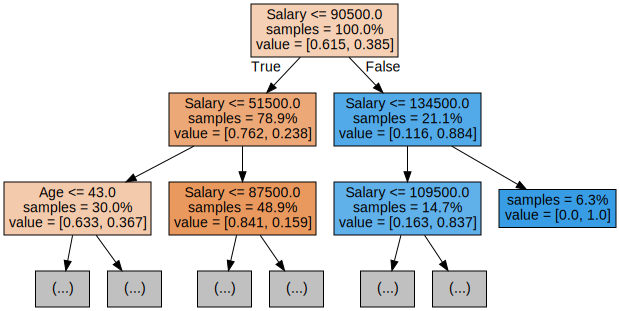

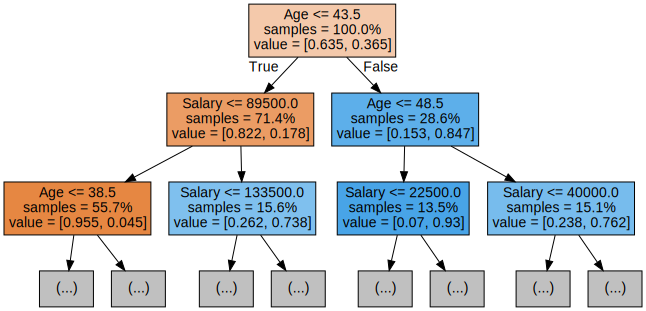

In [43]:
for i in range(3):
  tree = best_rf.estimators_[i]
  dot_data = export_graphviz(tree,
                              feature_names=X_train.columns,  
                              filled=True,  
                              max_depth=2, 
                              impurity=False, 
                              proportion=True)
  graph = graphviz.Source(dot_data)
  display(graph)

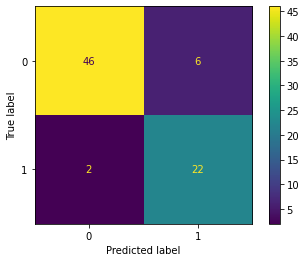

In [44]:
conf_matrix = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot();

In [45]:
def user_input():
  while True:
    try:
      age = input("Provide the customer's  age (numeric value): ")
      salary = input("Provide the customer's salary(numeric value): ")
      age = int(age)
      salary = int(salary)
      return age, salary
    except ValueError:
      print("One or more values given are nor numerical. Please, provide the numerical value as mentioned.")

In [46]:
def predict__customer_decision(model):
  age, salary = user_input()
  ds = pd.DataFrame({'Age' : [age], 'Salary' : [salary]})
  if model.predict(ds)[0] == 'yes':
    return "The customer of the given age and salary will buy the watch."
  else:
    return "The customer of the given age and salary will not buy the watch."


In [50]:
predict__customer_decision(best_rf)

Provide the customer's  age (numeric value): 18
Provide the customer's salary(numeric value): 15000


'The customer of the given age and salary will not buy the watch.'

In [48]:
df["Salary"].min()

15000

In [49]:
df["Age"].min()

18